In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
!pip install seaborn
import seaborn as sns
import warnings 


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline 
sns.set()
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('Churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


A quick look at the dataset tells us that the columns RowNumber, CustomerId and Surname will not have any impact on the customer leaving the bank. Out of the remaining variables, Geography, Gender, NumOfProducts, HasCrCard and IsActiveMember are categorical variables and the remaining variables i.e. CreditScore, Age, Tenure, Balance and EstimantedSalary  are numerical variables.


In [8]:
df.isnull().sum().to_frame("No. of nulls ")

,No. of nulls
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

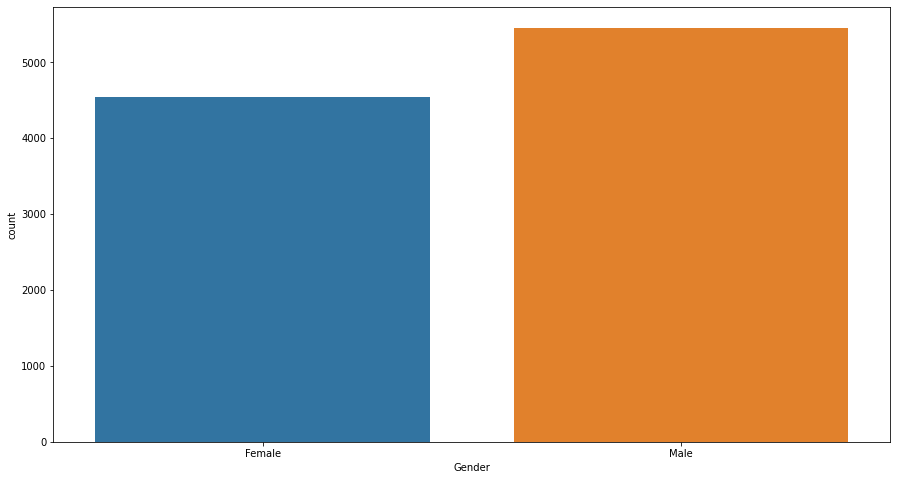

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.Gender)

<AxesSubplot:xlabel='Geography', ylabel='count'>

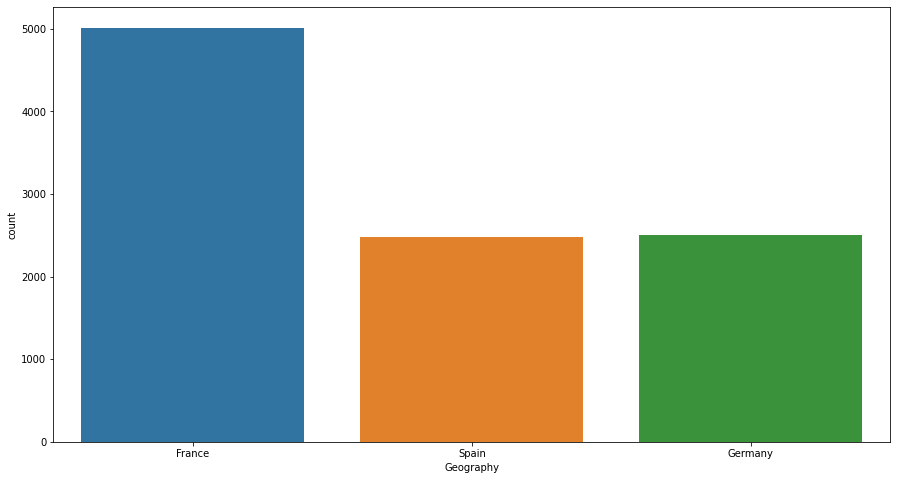

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.Geography)

<AxesSubplot:>

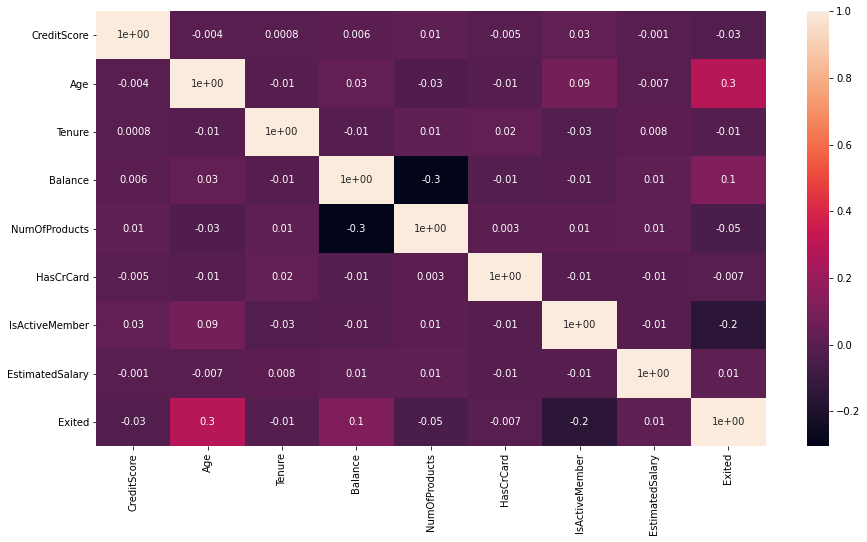

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,fmt='.1')

<AxesSubplot:>

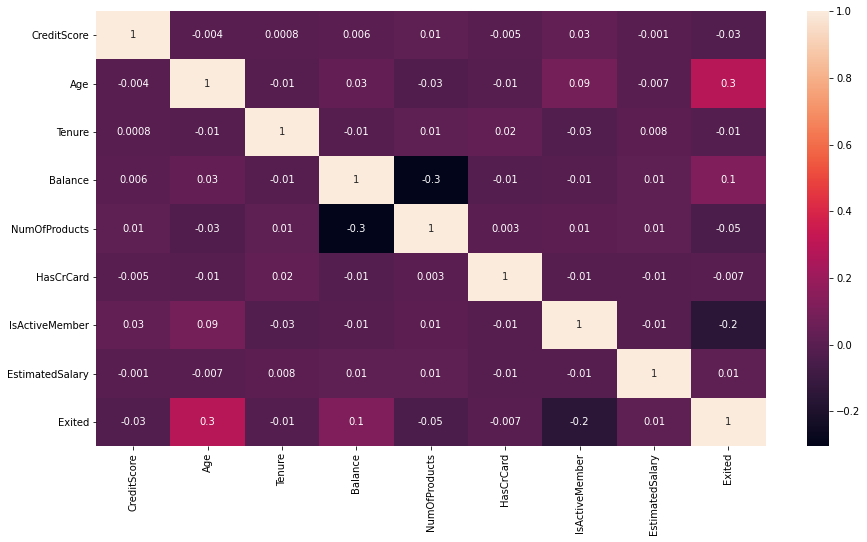

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,fmt='.1g')

#  analysis between Frequency and CreditScore of customers.!!

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


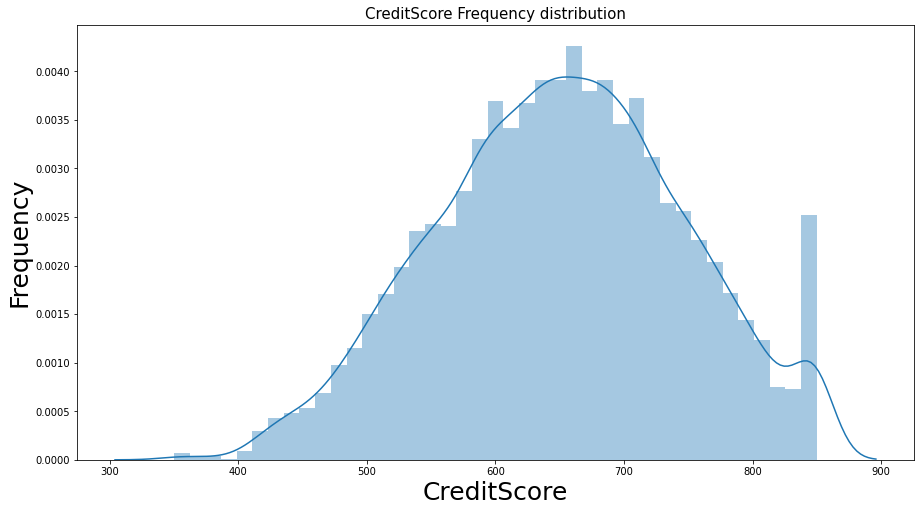

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency',fontsize=25)
plt.xlabel('CreditScore',fontsize=25)
plt.title('CreditScore Frequency distribution',fontsize=15)
plt.show()

In [16]:
list(df.Geography.unique())

['France', 'Spain', 'Germany']

below are some of the plots which i used to visualize. there are many type of plots with different types. 
here we can see that analysis of geography and creditscore is done and visuaize through catplot with swarm kind than by violin and boxen!!! 

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

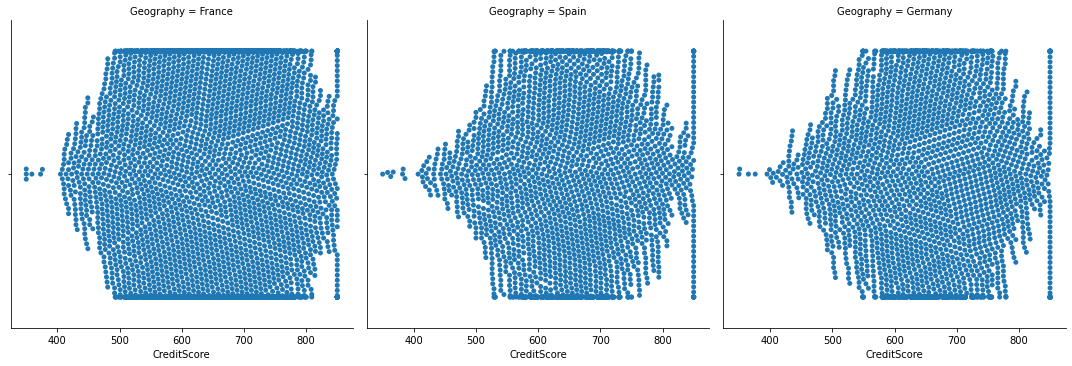

In [20]:
plt.figure(figsize=(15,8))
sns.catplot(kind='swarm',x='CreditScore',data=df,col='Geography')

<Figure size 1080x576 with 0 Axes>

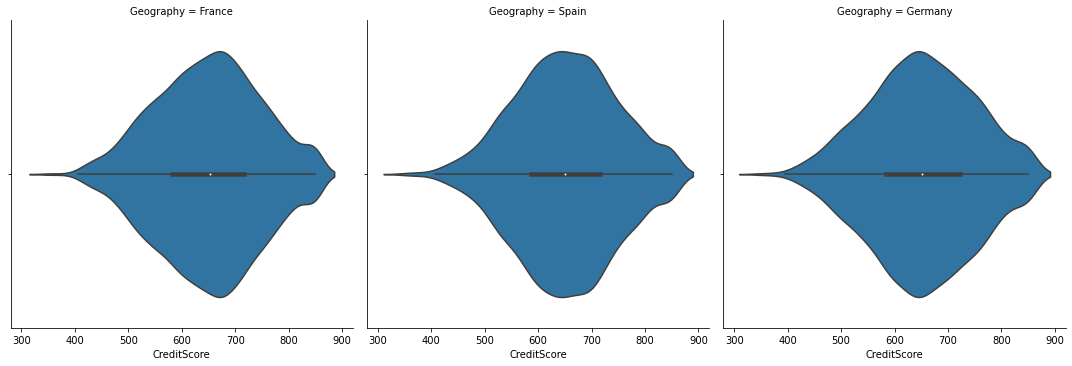

In [21]:
plt.figure(figsize=(15,8))
sns.catplot(kind='violin',x='CreditScore',data=df,col='Geography')

<Figure size 1080x576 with 0 Axes>

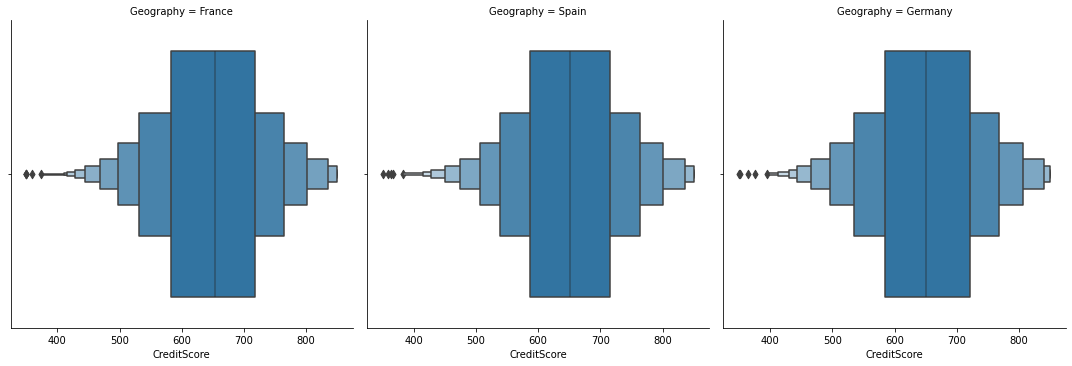

In [22]:
plt.figure(figsize=(15,8))
sns.catplot(kind='boxen',x='CreditScore',data=df,col='Geography')

<Figure size 1080x576 with 0 Axes>

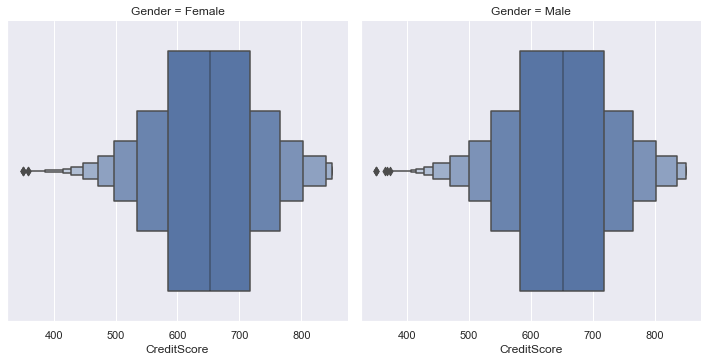

In [20]:
plt.figure(figsize=(15,8))
sns.catplot(kind='boxen',x='CreditScore',data=df,col='Gender')

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

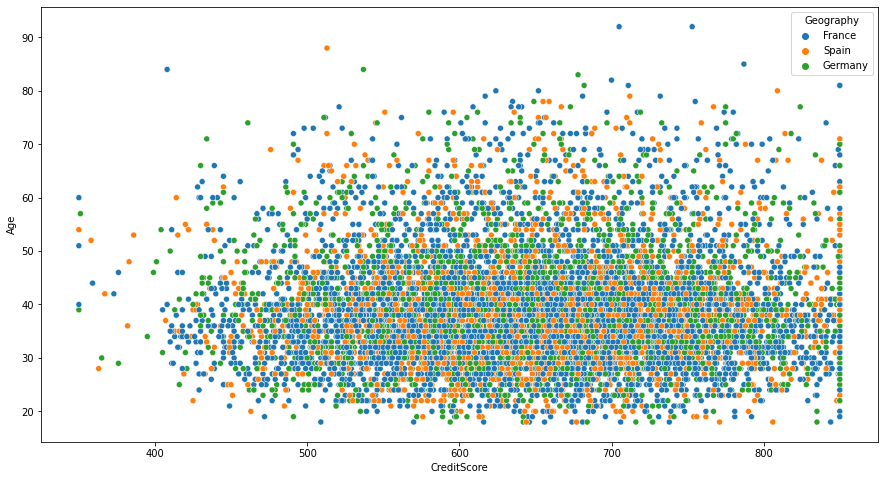

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='CreditScore',data=df,y='Age',hue='Geography')


The above scatterplot shows us the countrywise variation of Age according to Creditscore. From the graph is evident that there is no correlation between Creditscore and age. Everywhere in the plot where we select we have France and Germany with the maximum number of records. Spain on the other hand is always the least one. Sometimes not even appear in the selection. We also see that only France and Spain have accounts with 0 balance. This is really ironic as Germany has the highest churn rate. This invalidates the hypothesis that customers who don't use the bank account i.e who have zero bank balance are more likely to leave the bank.

Another alternative for this situation would be a bar chart, but the chart would be difficult to interpret. To avoid this, we used scatter plot.

In [35]:
df[['Age','CreditScore']].corr()

,Age,CreditScore
Age,1.000000,-0.003965
CreditScore,-0.003965,1.000000


Credit score with response variable(exited)

Credit score with response variable(exited)

<AxesSubplot:xlabel='Exited', ylabel='count'>

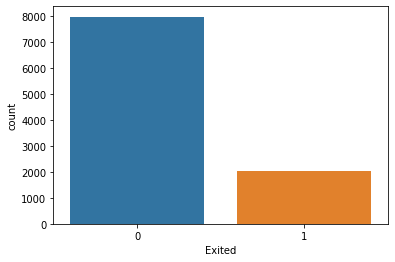

In [33]:
sns.countplot(x='Exited',data=df)

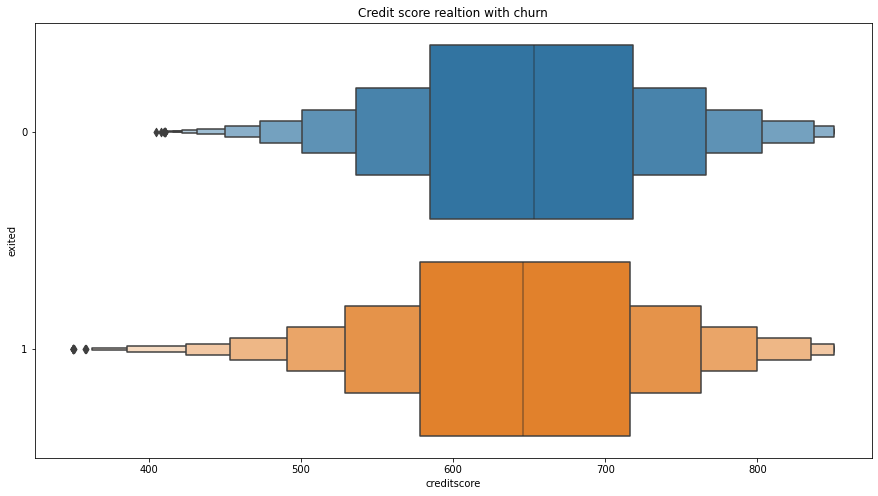

In [34]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='CreditScore',y='Exited',data=df,orient='h')
plt.xlabel('creditscore')
plt.ylabel('exited')
plt.title('Credit score realtion with churn')
plt.show()

In [36]:
df[['Tenure','Geography']].dtypes

Tenure        int64
Geography    object
dtype: object

In [37]:
print('Unique years of tenure:',list(np.sort(df.Tenure.unique())))

Unique years of tenure: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


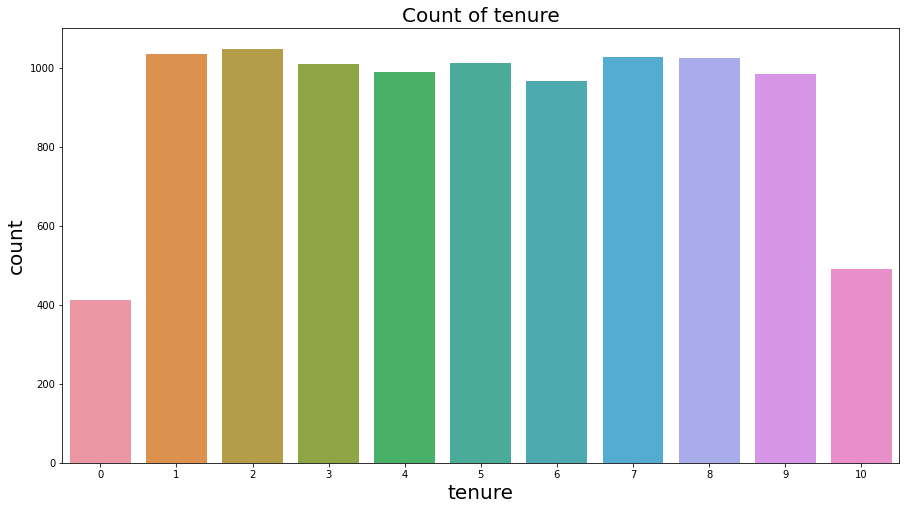

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.Tenure)
plt.xlabel('tenure',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Count of tenure',fontsize=20)
plt.show()

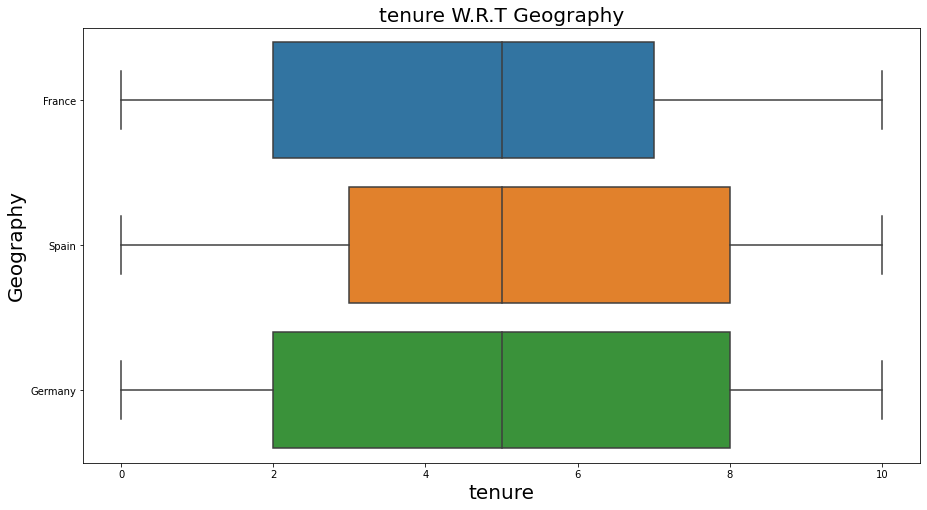

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Tenure',y='Geography',data=df)
plt.xlabel('tenure',fontsize=20)
plt.ylabel('Geography',fontsize=20)
plt.title('tenure W.R.T Geography',fontsize=20)
plt.show()

([<matplotlib.axis.YTick at 0x1f6e643a8b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

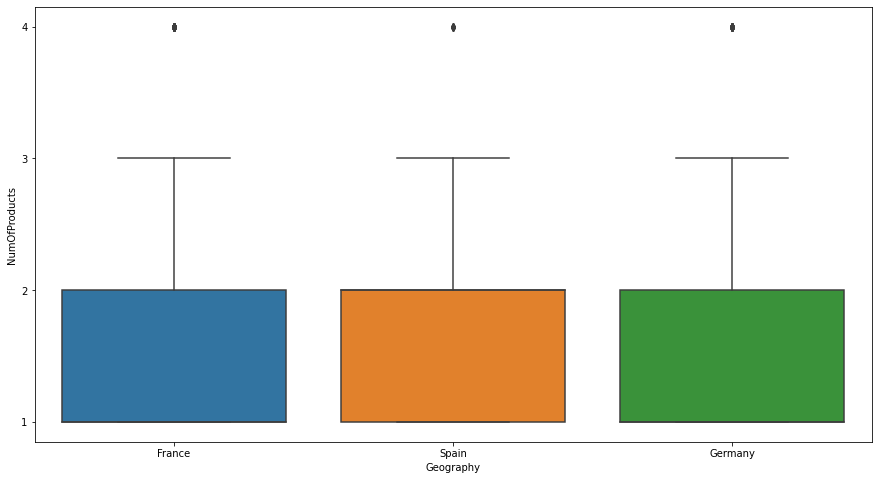

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Geography',y='NumOfProducts',data=df)
plt.yticks([1,2,3,4])

# here we had compare the customers of particular region and has credit card of the bank 

<Figure size 1080x576 with 0 Axes>

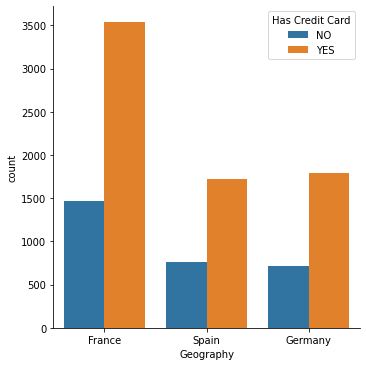

In [41]:
plt.figure(figsize=(15,8))
sns.catplot(kind='count',x='Geography',hue='HasCrCard',data=df,legend=False)
plt.legend(title='Has Credit Card', labels=['NO','YES'])
plt.show()

# here we had compare the customers of particular region and has exited or leaved the bank

<Figure size 1080x576 with 0 Axes>

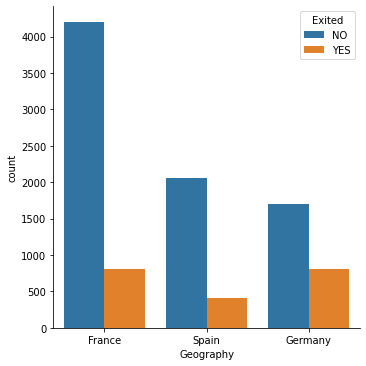

In [42]:
plt.figure(figsize=(15,8))
sns.catplot(kind='count',x='Geography',hue='Exited',data=df,legend=False)
plt.legend(title='Exited', labels=['NO','YES'])
plt.show()

# here we had compare the customers of particular Gender and has exited or leaved the bank!!!

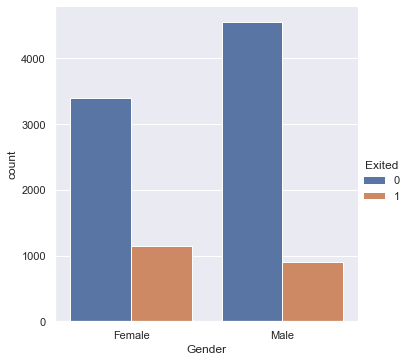

In [33]:
sns.catplot(x='Gender',hue='Exited',data=df,kind='count')

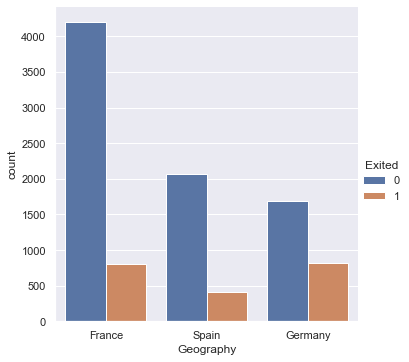

In [34]:
sns.catplot(x='Geography',hue='Exited',data=df,kind='count')

In [35]:
df.Age.dtype

dtype('int64')

In [36]:
np.sort(df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Exited'>

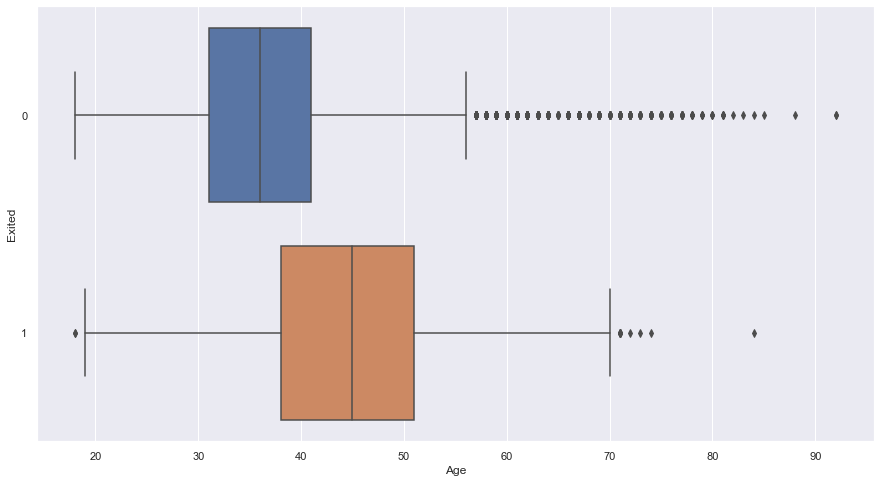

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.Age,y=df.Exited,orient='h')

here above we have check age wise account holders those have churned and not churned 

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

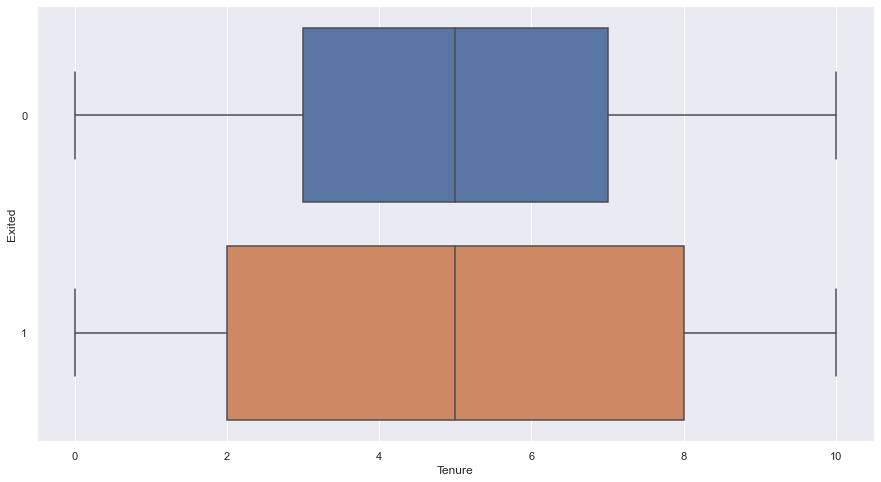

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Tenure',y='Exited',data=df,orient='h')

In [39]:
df[['Tenure','Exited']].corr()

,Tenure,Exited
Tenure,1.000000,-0.014001
Exited,-0.014001,1.000000


correlation is less.

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

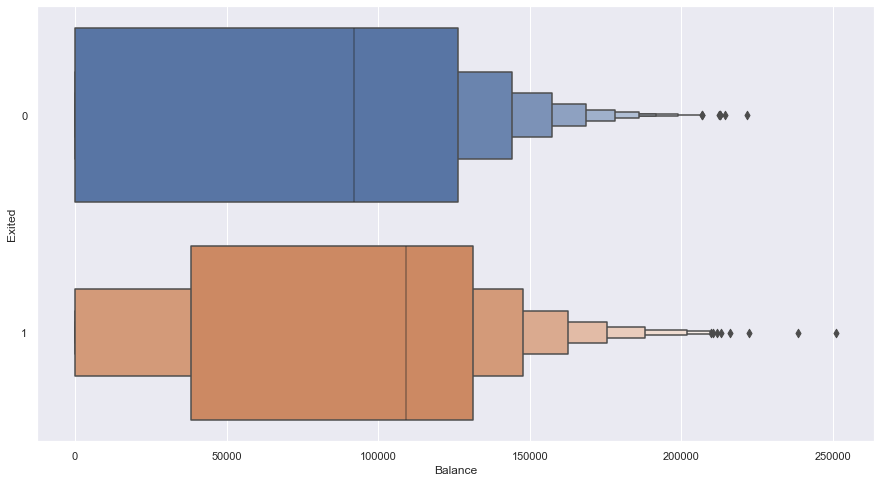

In [41]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Balance',y='Exited',data=df,orient='h')

([<matplotlib.axis.YTick at 0x1eb4d58c7f0>,
 [Text(0, 0, ''), Text(0, 0, '')])

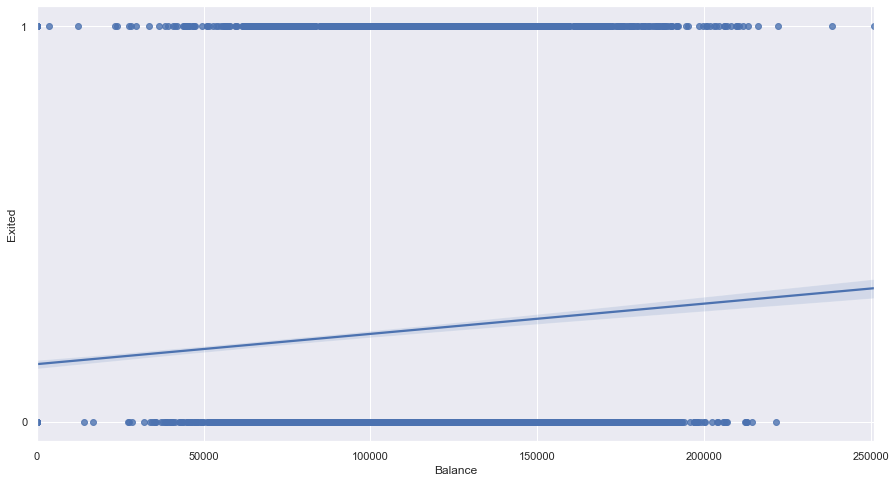

In [44]:
plt.figure(figsize=(15,8))
sns.regplot(x=df.Balance,y=df.Exited)
plt.yticks([0,1])

# number of products

In [46]:
df.NumOfProducts.dtype

dtype('int64')

In [47]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

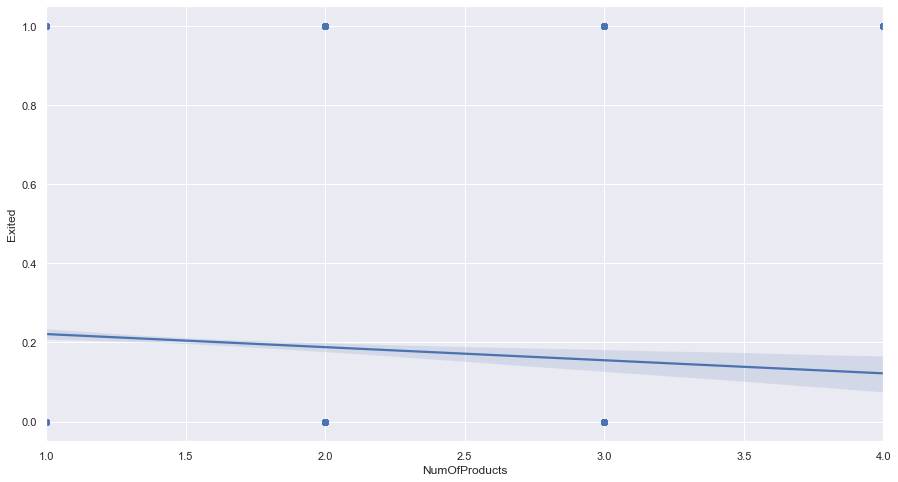

In [48]:
plt.figure(figsize=(15,8))
sns.regplot(x=df.NumOfProducts,y=df.Exited)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

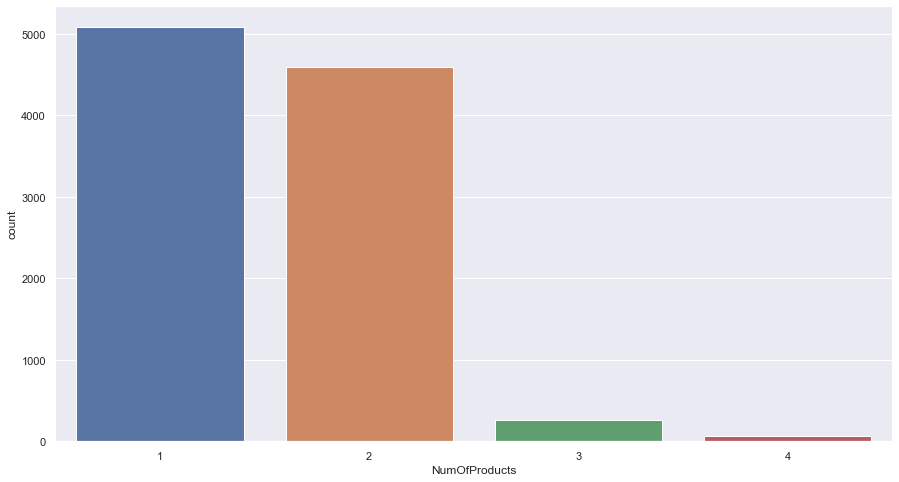

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.NumOfProducts)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

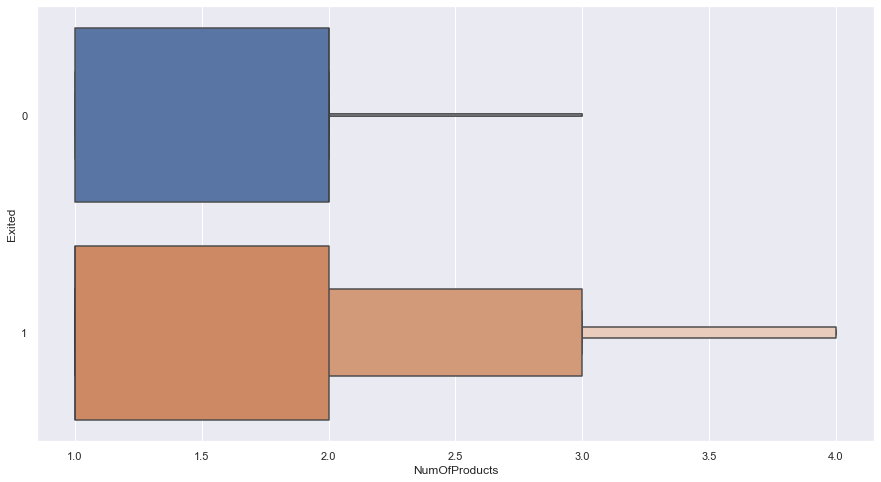

In [51]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=df.NumOfProducts,y=df.Exited,orient='h')

In [52]:
df[["NumOfProducts","Exited"]].corr()

,NumOfProducts,Exited
NumOfProducts,1.00000,-0.04782
Exited,-0.04782,1.00000


#  Has Credit Card and churning!!! 

In [54]:
df.HasCrCard.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

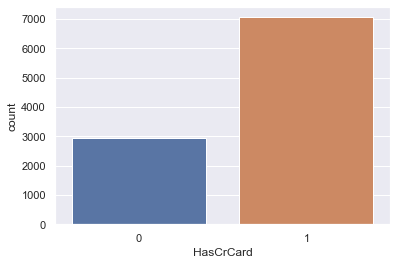

In [55]:
sns.countplot(x=df.HasCrCard)

<Figure size 1080x576 with 0 Axes>

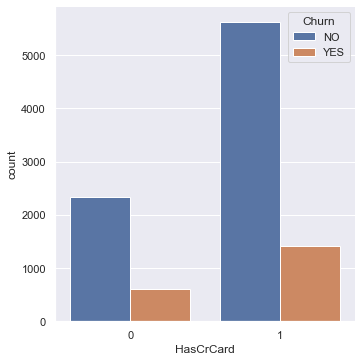

In [64]:
plt.figure(figsize=(15,8))
sns.catplot(x='HasCrCard',hue='Exited',data=df,kind='count',legend=False)
plt.legend(title='Churn',labels=['NO','YES'])

#  Active member

In [59]:
df.IsActiveMember.dtype

dtype('int64')

In [60]:
df.IsActiveMember.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

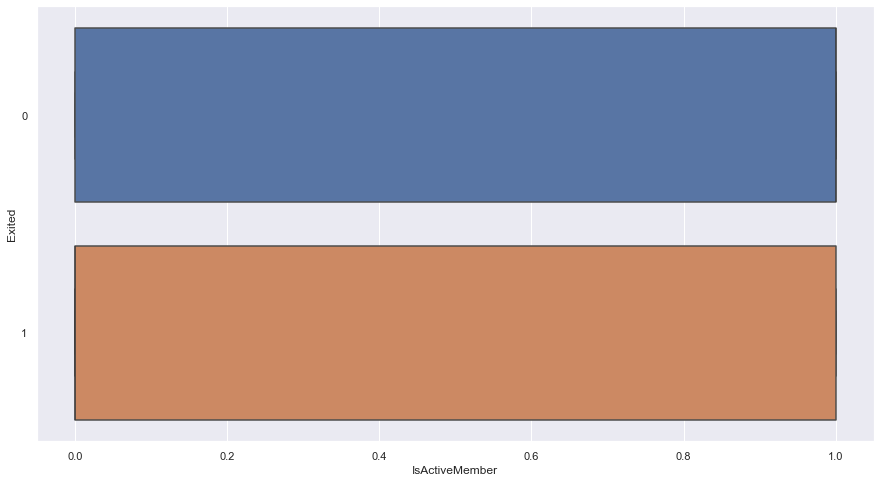

In [65]:
plt.figure(figsize=(15,8))
sns.boxenplot(x=df.IsActiveMember,y=df.Exited,orient='h')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


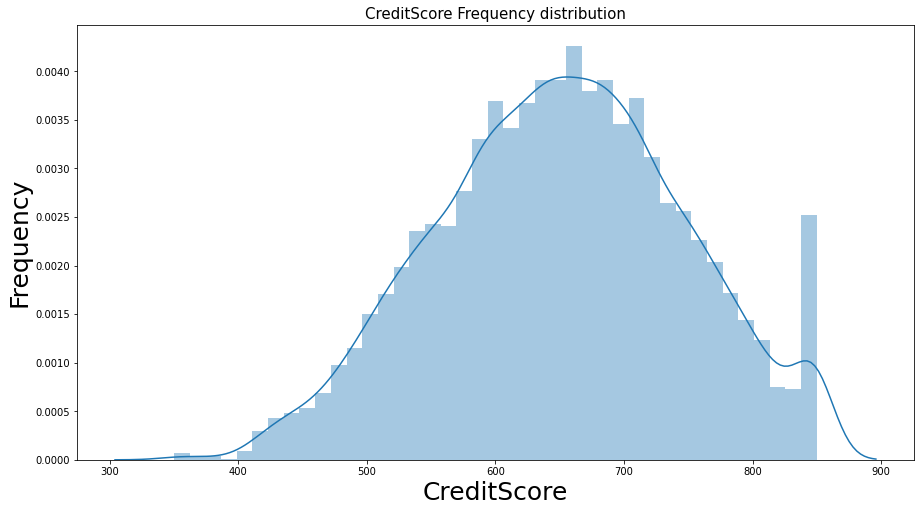

In [43]:
plt.figure(figsize=(15,8))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency',fontsize=25)
plt.xlabel('CreditScore',fontsize=25)
plt.title('CreditScore Frequency distribution',fontsize=15)
plt.show()


# The Frequency interactive plot shows the distribution of credit Score.

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Balance',data=df,y='count',hue='Geography')

# In this interactive chart we see for the three countries the distribution of balance. The balance variable was binned with an interval. For the first  balance Germany has almost negligibe number of records. On the other hand in the balance Germany has the highest, followed by France and Spain, respectively.This once again proves that people in Germany are really prosperous. But why is it that Germany has the greatest churn rate? It could be because there are other banks in Germany have better products as compared to this bank. Since we don't have any data regarding this, the best we can do is to speculate.